In [1]:
from q_alchemy.initialize import OptParams
from q_alchemy.pennylane_integration import pennylane_batch_initialize
import pennylane as qml
import numpy as np

In [7]:
n_qubits = 4
n_states = 4
state_vectors = [np.random.rand(2 ** n_qubits) + np.random.rand(2 ** n_qubits) * 1j
                 for i in range(n_states)]
state_vectors = [sv / np.linalg.norm(sv) for sv in state_vectors]

dev = qml.device('default.qubit')

max_fidelity_loss = 0.05

circ_list = pennylane_batch_initialize(
    state_vectors=state_vectors,
    wires=range(n_qubits),
    opt_params=OptParams(
        max_fidelity_loss=max_fidelity_loss,
        api_key='<your API key here>'
    )
)

@qml.qnode(dev)
def circuit_pennylane(circ):
    circ()
    return qml.state()

states_pennylane = [circuit_pennylane(circ) for circ in circ_list]

C:\Users\KeithNg\Repos\qalchemy\q-alchemy-sdk-py\.venv\Lib\site-packages\pinexq_client\job_management\enterjma.py:35: UserWarning: Version mismatch between 'pinexq_client' (v8.2.0) and 'JobManagementAPI' (v8.3.0)! 
  warnings.warn(


In [8]:
for state_vector, state_pennylane in zip(state_vectors, states_pennylane):
    fidelity = abs(np.vdot(state_vector, state_pennylane)) ** 2
    print(fidelity)
    diff_norm = np.linalg.norm(state_vector - state_pennylane) ** 2
    print(diff_norm)

0.9760589059696925
0.024086129438135585
0.9530706879581209
0.04749321337095429
0.9944983088192039
0.005509279220177904
0.970834544311863
0.029381270451472367


C:\Users\KeithNg\AppData\Local\Temp\ipykernel_12176\3290520903.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


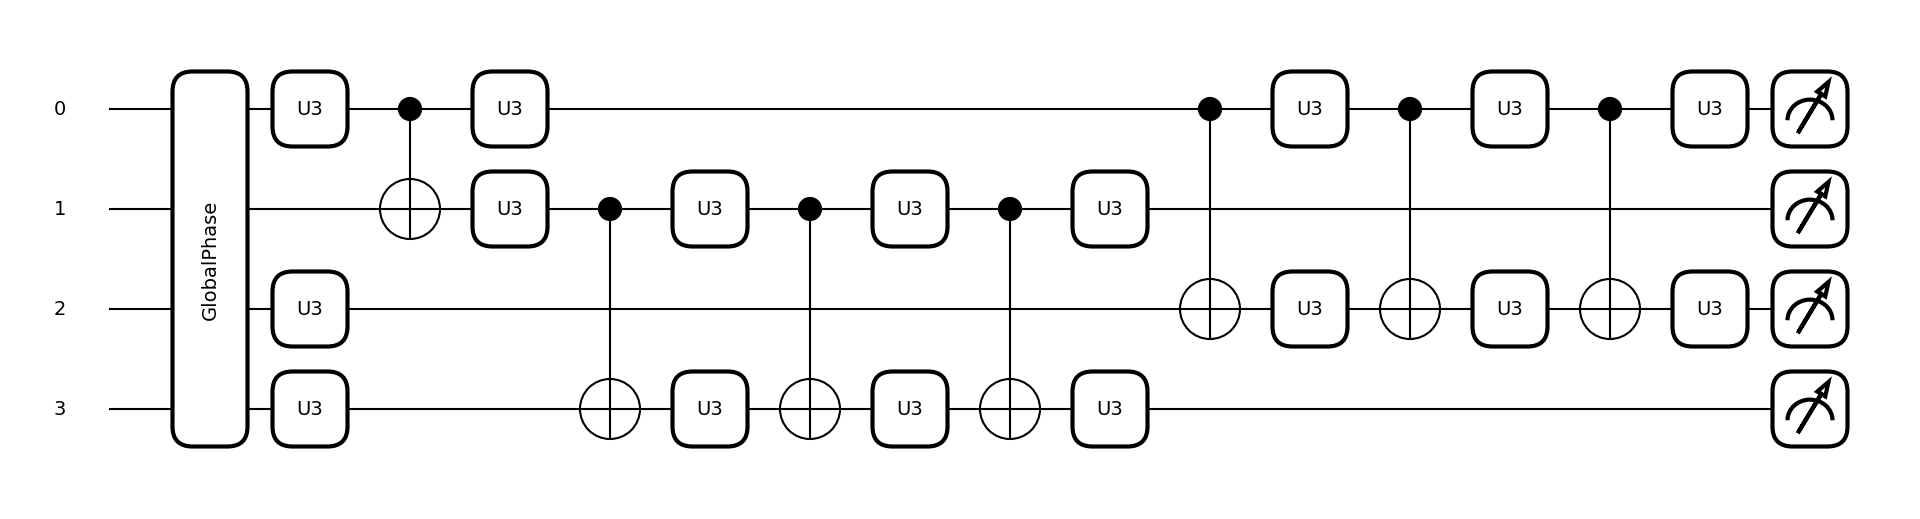

In [9]:
fig, ax = qml.draw_mpl(circuit_pennylane)(circ_list[0])
fig.show()